https://github.com/lokesMCI/QuantumClassification-using-VQC/blob/main/BasicML.ipynb

In [ ]:
!pip install -U "qiskit==1.2.4" "qiskit-machi ne-learning==0.7.1" "qiskit-algorithms==0.4.0"

In [2]:
# import numpy as np

# # Importing standard Qiskit libraries

# from qiskit import QuantumCircuit, transpile
# from qiskit.visualization import *
# from qiskit_aer import Aer
# from qiskit_ibm_runtime import QiskitRuntimeService

# # from qiskit import QuantumCircuit, IBMQ
# from qiskit.tools.jupyter import *
# from qiskit.visualization import *
# from ibm_quantum_widgets import *
# from qiskit.providers.aer import QasmSimulator

# # Loading your IBM Quantum account(s)
# provider = IBMQ.load_account()

In [ ]:
# import numpy as np
# from qiskit import QuantumCircuit, transpile
# from qiskit_aer import Aer, AerSimulator
# from qiskit_ibm_runtime import QiskitRuntimeService
# from qiskit.visualization import *

# # --- Save your IBM Quantum account once (only run this once) ---
# # Replace with your actual API token from https://quantum.ibm.com/account
# QiskitRuntimeService.save_account(
#     channel="ibm_quantum",
#     token="",
#     overwrite=True
# )

# # --- Load the account for this session ---
# service = QiskitRuntimeService(channel="ibm_quantum")

# # --- List available backends ---
# print("\n✅ Available IBM Quantum Backends:")
# for backend in service.backends():
#     print("-", backend.name)



🧠 Simulation Results:
{'00': 511, '11': 513}


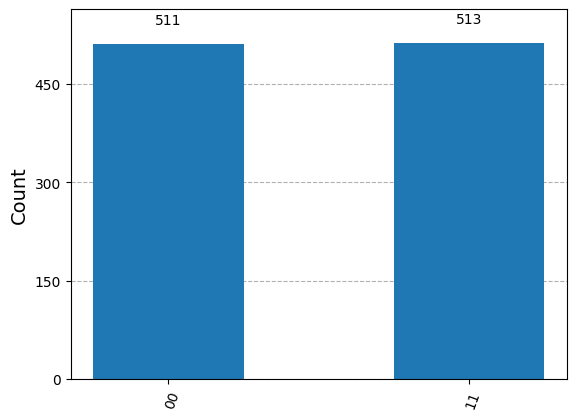

In [4]:
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram

# Create a simple circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Use a basic transpile config to avoid SABRE routing
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator, optimization_level=0)

# Run the simulation
job = simulator.run(compiled_circuit)
result = job.result()

# Show results
print("\n🧠 Simulation Results:")
print(result.get_counts())
plot_histogram(result.get_counts())

In [5]:
from sklearn.datasets import load_iris

iris_data = load_iris()

In [6]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
features = iris_data.data
labels = iris_data.target
print(len(features),len(labels))

150 150


In [8]:
from sklearn.preprocessing import MinMaxScaler

features = MinMaxScaler().fit_transform(features)

In [9]:
!pip install pylatexenc

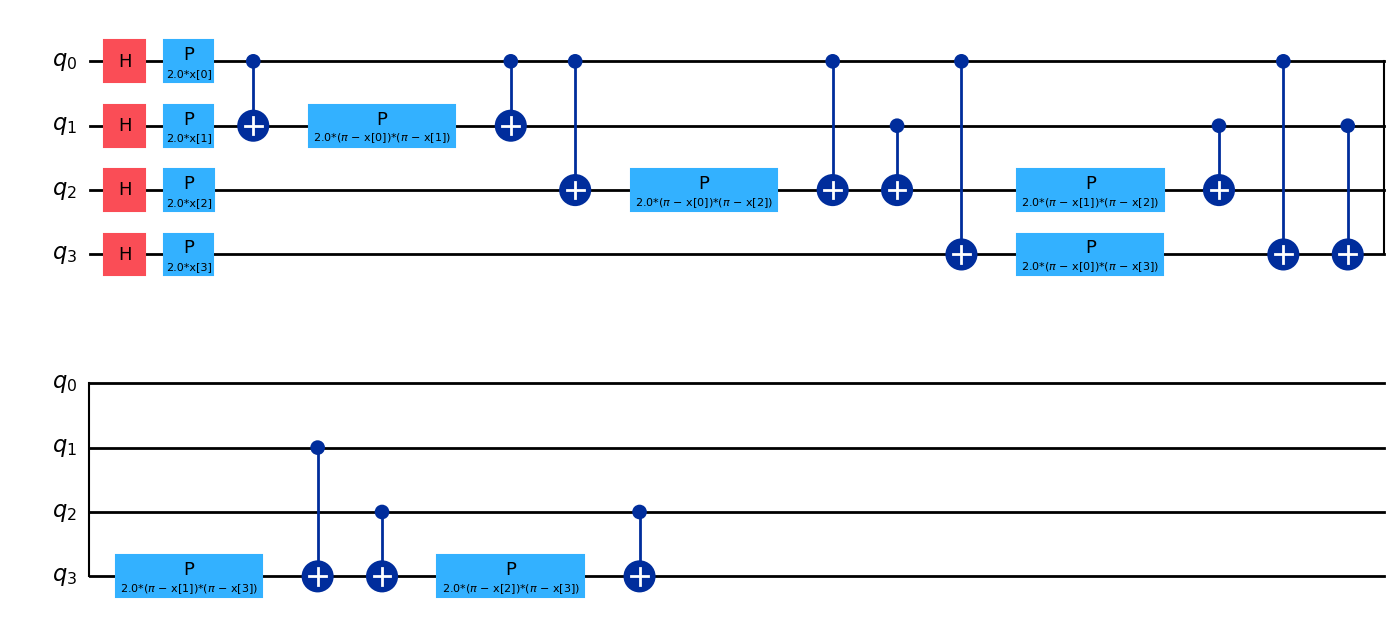

In [10]:
from qiskit.circuit.library import ZZFeatureMap

num_features = features.shape[1]

feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
feature_map.decompose().draw(output="mpl", fold=20)

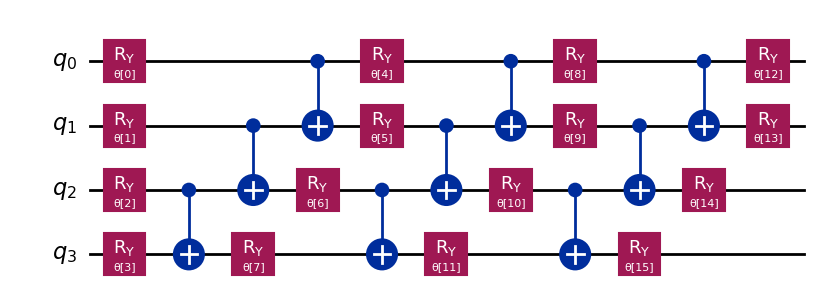

In [11]:
from qiskit.circuit.library import RealAmplitudes

ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
ansatz.decompose().draw(output="mpl", fold=20)

In [14]:
# from qiskit_algorithms.optimizers import COBYLA
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Estimator, Sampler
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import SPSA, COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC

optimizer = COBYLA(maxiter=100)

In [16]:
from sklearn.model_selection import train_test_split
from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 123
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, train_size=0.8, random_state=algorithm_globals.random_seed
)

In [18]:
sampler = Sampler()

import time
from qiskit_aer.primitives import Sampler
from qiskit_algorithms.optimizers import SPSA

from qiskit_machine_learning.algorithms.classifiers import VQC

vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    # callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

Training time: 36 seconds


In [ ]:
train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")

Quantum VQC on the training dataset: 0.66
Quantum VQC on the test dataset:     0.83


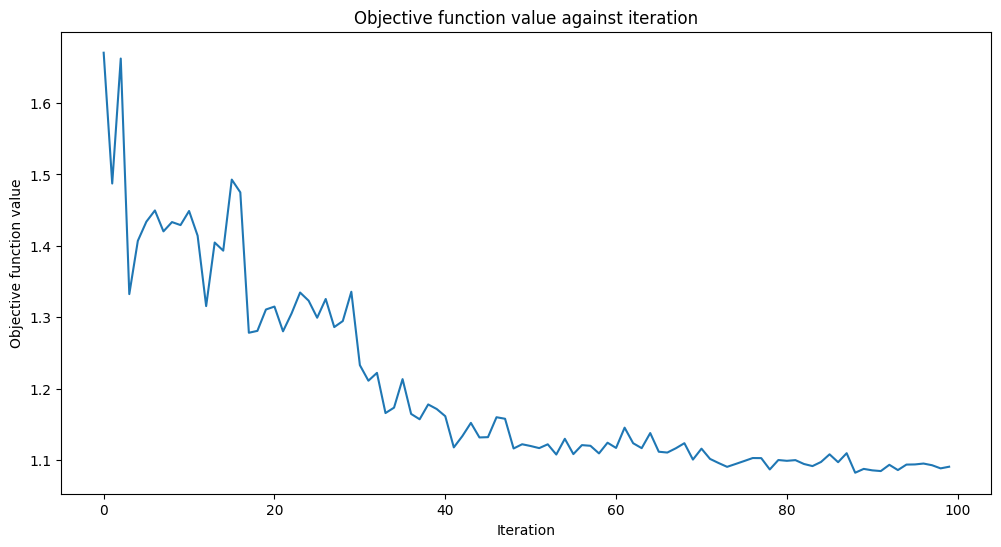

Training time: 56 seconds
Quantum VQC on the training dataset: 0.84
Quantum VQC on the test dataset:     0.80


In [20]:
from matplotlib import pyplot as plt
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()
    


sampler = Sampler()


vqc = VQC(
    sampler=sampler,
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=optimizer,
    callback=callback_graph,
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(train_features, train_labels)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

train_score_q4 = vqc.score(train_features, train_labels)
test_score_q4 = vqc.score(test_features, test_labels)

print(f"Quantum VQC on the training dataset: {train_score_q4:.2f}")
print(f"Quantum VQC on the test dataset:     {test_score_q4:.2f}")